In [1]:
import mySDC
import numpy as np
from matplotlib import pyplot as plt

#### Benchmarking on a sample Dahlquist problem

In [2]:
t0, u0 = 0.0, 1.0 + 0.j

steps = 101 # t=0. -> t=1.
timestep = 0.01
t = np.linspace(t0, t0 + (steps-1) * timestep, steps)

u = np.zeros((steps), dtype=np.cfloat)
uv = np.zeros((steps), dtype=np.cfloat)

##### EulerSDC + Lawson var change

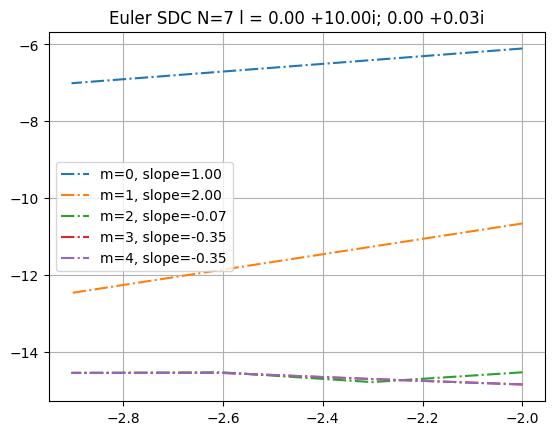

In [19]:
l1, l2 = 0. + 10.j, 0.03j
uv0 = u0 * np.exp(-t0 * l1)

N, M, folds = 7, 5, 4
fv = lambda t, x : x * l2

errors = np.zeros((M, folds), dtype="complex128")

for m in range(M):
    # errors in Lawson vars
    errors[m], tau = mySDC.benchmark(mySDC.Euler_SDC, (N, m, t, uv0, [fv]), lambda tt: np.exp(l2 * tt), folds, False)
    # error on u(t)
    errors[m] *= np.exp(tau * l1)
    # plot slopes
    slope, _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    plt.plot(np.log10(tau), np.log10(errors[m]), label='m=%d, slope=%.2f' % (m, slope.real), linestyle="-.")
plt.title('Euler SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi' % (N, l1.real, l1.imag, l2.real, l2.imag))
plt.legend()
plt.grid()

##### IMEXSDC

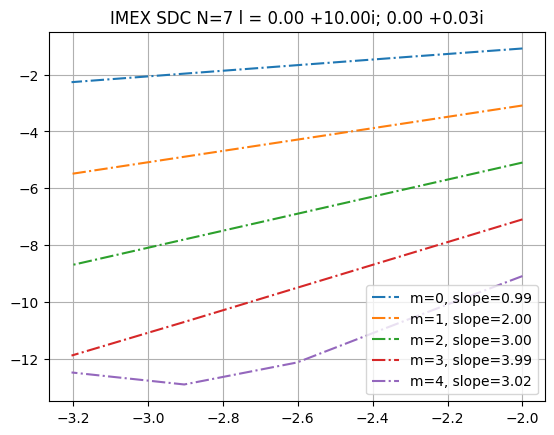

In [22]:
l1, l2 = 0. + 10.j, 0.03j
N, M, folds = 7, 5, 5
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")

for m in range(M):
    errors[m], tau = mySDC.benchmark(mySDC.IMEXSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, False)
    # plot slopes
    slope, _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    plt.plot(np.log10(tau), np.log10(errors[m]), label='m=%d, slope=%.2f' % (m, slope.real), linestyle="-.")
plt.title('IMEX SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi' % (N, l1.real, l1.imag, l2.real, l2.imag))
plt.legend()
plt.grid()

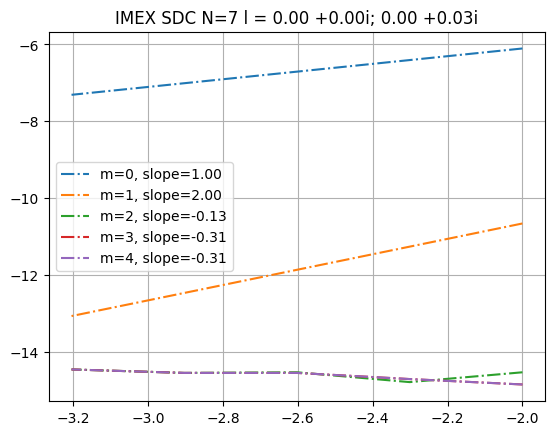

In [23]:
l1, l2 = 0. + 0.j, 0.03j
N, M, folds = 7, 5, 5
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")

for m in range(M):
    errors[m], tau = mySDC.benchmark(mySDC.IMEXSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, False)
    # plot slopes
    slope, _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    plt.plot(np.log10(tau), np.log10(errors[m]), label='m=%d, slope=%.2f' % (m, slope.real), linestyle="-.")
plt.title('IMEX SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi' % (N, l1.real, l1.imag, l2.real, l2.imag))
plt.legend()
plt.grid()

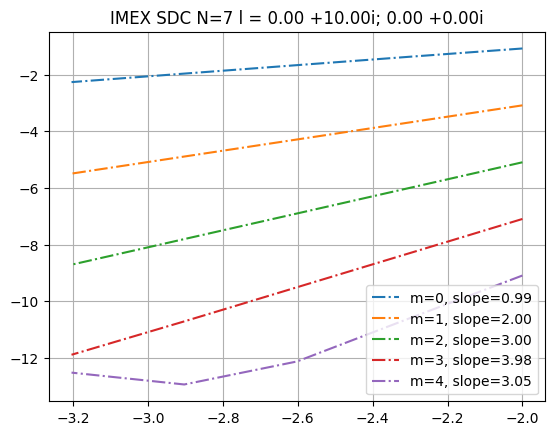

In [24]:
l1, l2 = 0. + 10.j, 0.j
N, M, folds = 7, 5, 5
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")

for m in range(M):
    errors[m], tau = mySDC.benchmark(mySDC.IMEXSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, False)
    # plot slopes
    slope, _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    plt.plot(np.log10(tau), np.log10(errors[m]), label='m=%d, slope=%.2f' % (m, slope.real), linestyle="-.")
plt.title('IMEX SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi' % (N, l1.real, l1.imag, l2.real, l2.imag))
plt.legend()
plt.grid()

0 sweeps
    dt     |   max(E)   | cpu time [ms]
---------------------------------------
1.0000e-02 | 1.3506e-15 | 1091.68
5.0000e-03 | 1.7653e-14 | 2124.65
2.5000e-03 | 2.2991e-14 | 4176.13
1 sweeps
    dt     |   max(E)   | cpu time [ms]
---------------------------------------


/opt/homebrew/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1.0000e-02 | 2.1876e-15 | 1064.70
5.0000e-03 | 1.8345e-14 | 2111.24
2.5000e-03 | 2.5280e-14 | 4200.45
2 sweeps
    dt     |   max(E)   | cpu time [ms]
---------------------------------------
1.0000e-02 | 2.1876e-15 | 1063.02
5.0000e-03 | 1.8345e-14 | 2110.06
2.5000e-03 | 2.5280e-14 | 4218.00


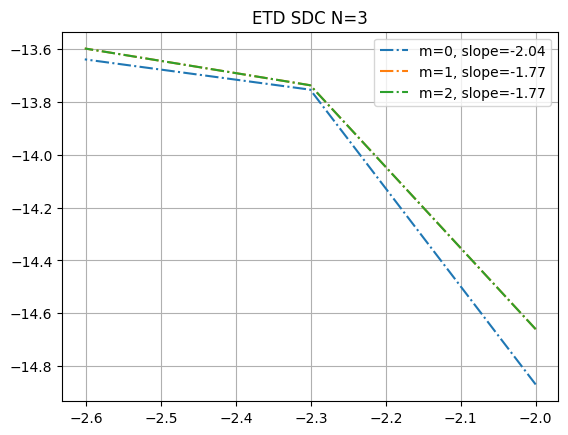

In [3]:
l1, l2 = 0. + 10.j, 0.j
N, M, folds = 3, 3, 3
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")

for m in range(M):
    errors[m], tau = mySDC.benchmark(mySDC.ETDSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, True)
    # plot slopes
    slope, _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    plt.plot(np.log10(tau), np.log10(errors[m]), label='m=%d, slope=%.2f' % (m, slope.real), linestyle="-.")
plt.title('ETD SDC N=%d' % N)
plt.legend()
plt.grid()

In [ ]:
l1, l2 = 0. + 0.j, 0.03j
N, M, folds = 3, 3, 3
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")

for m in range(M):
    errors[m], tau = mySDC.benchmark(mySDC.ETDSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, True)
    # plot slopes
    slope, _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    plt.plot(np.log10(tau), np.log10(errors[m]), label='m=%d, slope=%.2f' % (m, slope.real), linestyle="-.")
plt.title('ETD SDC N=%d' % N)
plt.legend()
plt.grid()